# Importing standard libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")



# Seeding values
# This is done so that code values stay uniform

In [2]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)

# Reading the data into a dataframe

In [9]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Analyzing-Risk-of-CHD-with-Discriminative-NN/master/framingham.csv'
hd=pd.read_csv(url)
hd.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Data exploration

In [10]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [11]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


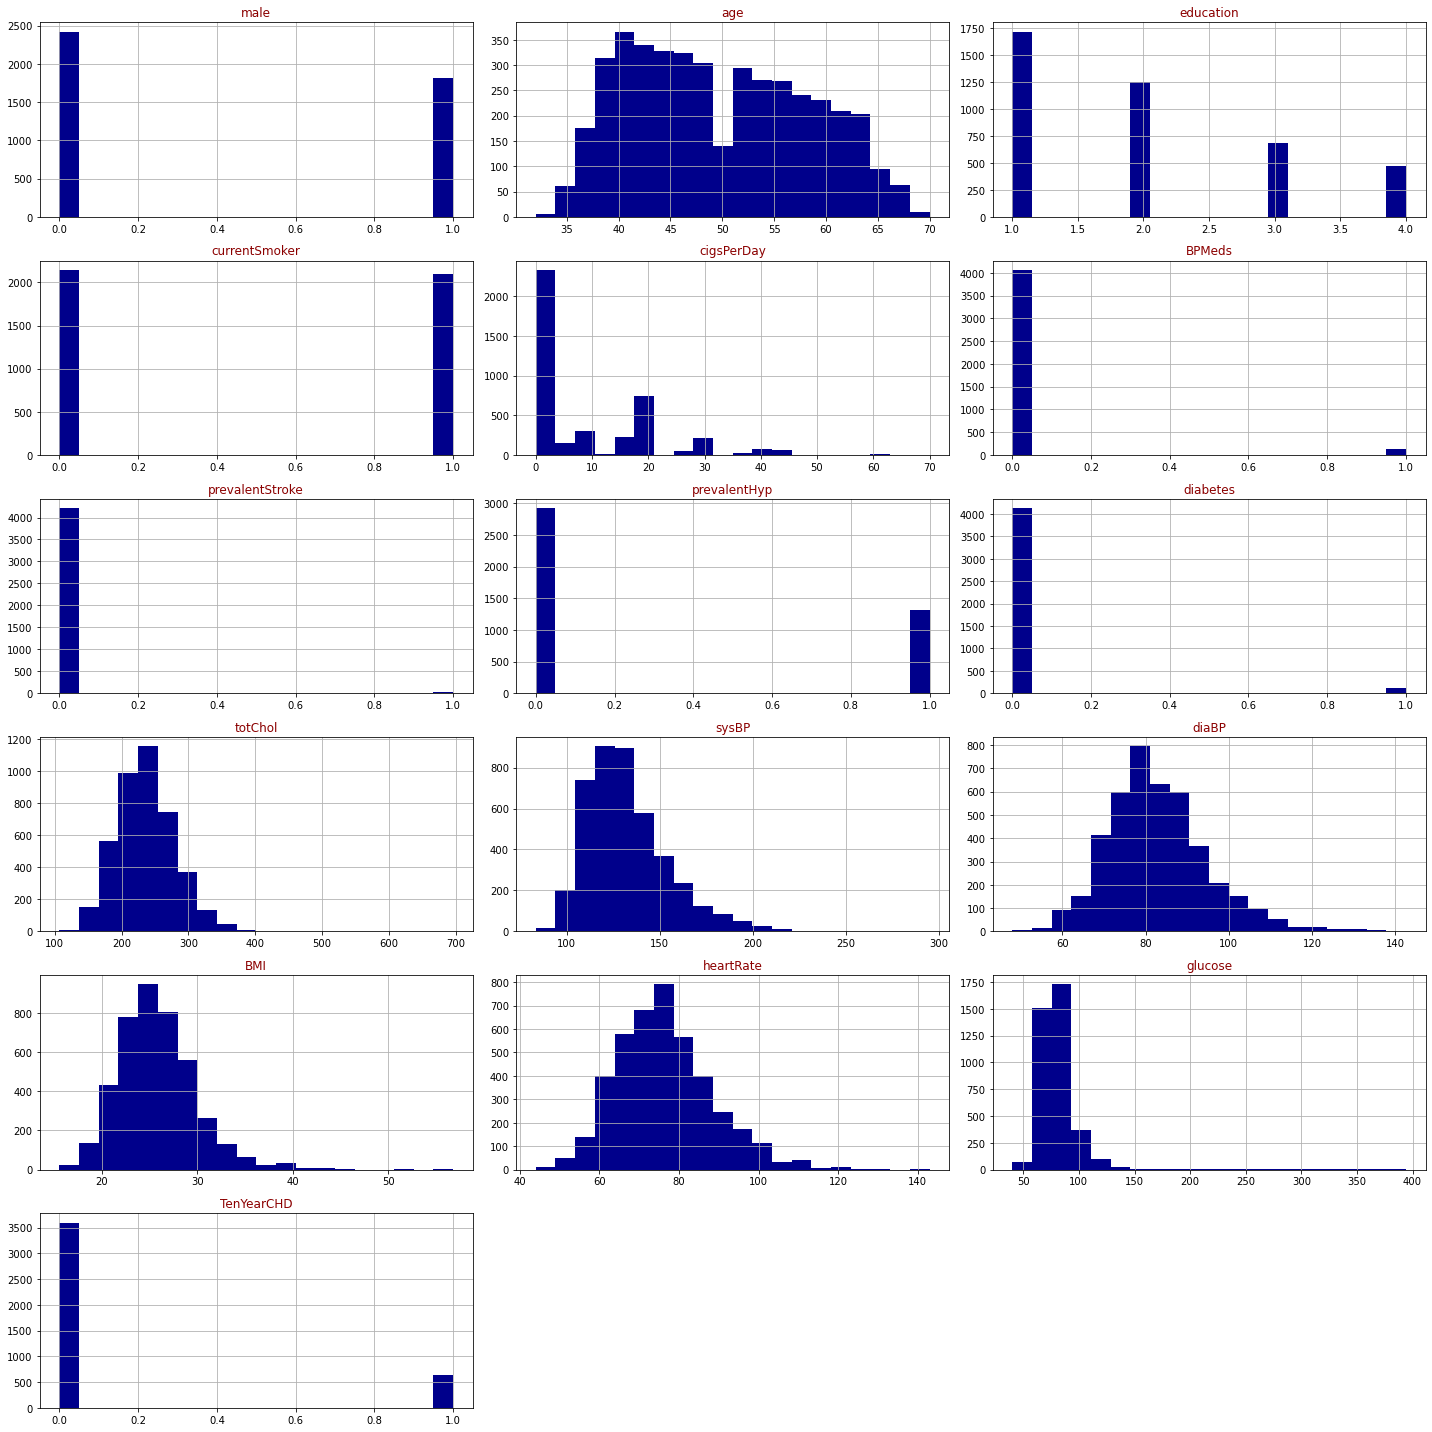

In [12]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

<AxesSubplot:>

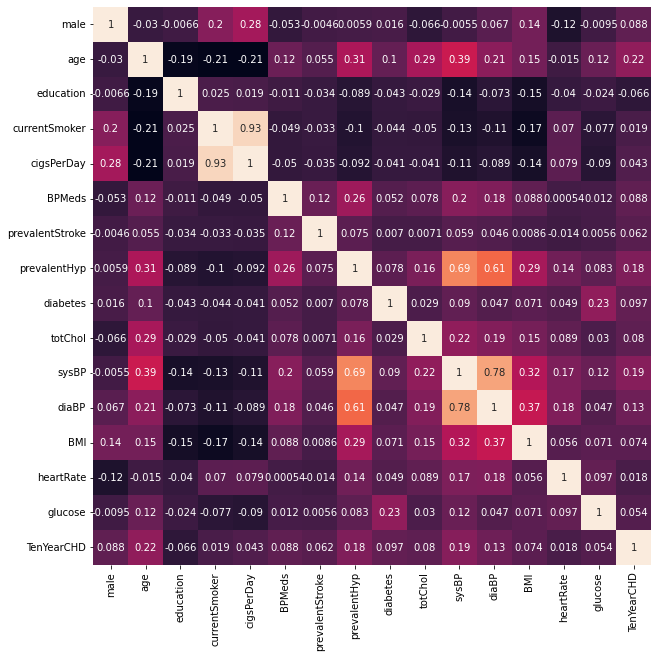

In [13]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


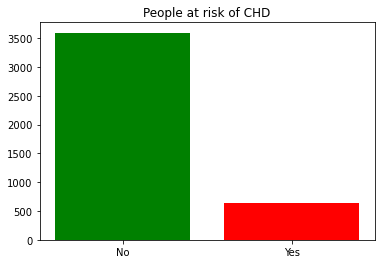

In [14]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [15]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Imputing missing values using different techniques

In [16]:
import random
hd.BPMeds = hd.BPMeds.fillna(0)
edu = [1, 2, 3, 4]
c = 0
for i in range(len(hd.education)):
    if hd.education[i] not in edu:
        t = random.randint(1, 4)
        hd.education[i] = t
print(hd.isnull().sum())

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [18]:
pip install fancyimpute

  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=f0f20e803010fee996415a6648ab7539814837114494c762249599548681b227
  Stored in directory: c:\users\hi\appdata\local\pip\cache\wheels\f9\fc\6a\b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=f00ffa1fc587abb997b88481f9fcdedcbc5c42c3b57be912a75f78c85838b788
  Stored in directory: c:\users\hi\appdata\local\pip\cache\wheels\88\c4\be\e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.2.0
    Uninstalling setuptools-61.2.0:
      Successfully uninstalled setuptools-61.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


In [19]:
from fancyimpute import IterativeImputer
hdi = pd.DataFrame(IterativeImputer().fit_transform(hd))
hdi.columns = hd.columns

In [20]:
hdi.isnull().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
hdi.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
5,0.0,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.000000,0.0
6,0.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.000000,1.0
7,0.0,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.000000,0.0
8,1.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.000000,0.0
9,1.0,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.000000,0.0


In [22]:
hdi.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.989623,0.494104,9.067550,0.029245,0.005896,0.310613,0.025708,236.752571,132.354599,82.897759,25.800256,75.878895,81.816110,0.151887
std,0.495027,8.572942,1.024303,0.500024,11.906124,0.168513,0.076569,0.462799,0.158280,44.355154,22.033300,11.910394,4.073059,12.023931,23.013810,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.385000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,85.616281,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Creating the training and testing data

In [24]:
hd_ = hdi.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
hd_['age'] = hd_['age'].apply(lambda x: round(x*0.2, 2))
hd_['education'] = hd_['education'].apply(lambda x: round(x*0.25, 2))
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))
hd_.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.2,1.00,0.0,0.16,0.0,0.0,0.0,0.0,0.15,0.2,0.25,0.3,0.38,0.13,0.0
1,0.0,0.4,0.50,0.0,0.16,0.0,0.0,0.0,0.0,0.31,0.2,0.38,0.4,0.62,0.13,0.0
2,1.0,0.6,0.25,1.0,0.32,0.0,0.0,0.0,0.0,0.31,0.3,0.38,0.3,0.38,0.13,0.0
3,0.0,0.8,0.75,1.0,0.48,0.0,0.0,1.0,0.0,0.23,0.4,0.50,0.4,0.25,0.20,1.0
4,0.0,0.4,0.75,1.0,0.32,0.0,0.0,0.0,0.0,0.31,0.3,0.50,0.2,0.50,0.13,0.0
5,0.0,0.4,0.50,0.0,0.16,0.0,0.0,1.0,0.0,0.23,0.5,0.75,0.4,0.38,0.20,0.0
6,0.0,1.0,0.25,0.0,0.16,0.0,0.0,0.0,0.0,0.23,0.3,0.25,0.5,0.25,0.13,1.0
7,0.0,0.4,0.50,1.0,0.32,0.0,0.0,0.0,0.0,0.39,0.1,0.25,0.2,0.38,0.13,0.0
8,1.0,0.6,0.25,0.0,0.16,0.0,0.0,1.0,0.0,0.31,0.3,0.50,0.3,0.38,0.13,0.0
9,1.0,0.4,0.25,1.0,0.48,0.0,0.0,1.0,0.0,0.23,0.4,0.62,0.2,0.50,0.20,0.0


In [25]:
attrib = hd_.iloc[:, :-1]
lab = hd_.iloc[:, -1]

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, 
                             test_size = 0.2, 
                             random_state = 1)
attrib = np.array(attrib)
lab = np.array(lab)
for train_index, test_index in sss.split(attrib, lab):
    x_train, x_test = attrib[train_index], attrib[test_index]
    y_train, y_test = lab[train_index], lab[test_index]

# Creating and compiling the neural network model
# The model contains two hidden layers, each with 256 neurons. Dropout and regularization are applied to ensure that there is no overfitting

In [27]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(256, input_dim = 15,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
model.add(Dropout(0.175))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(256,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.175))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.175))
model.add(Activation('sigmoid'))

In [28]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4096      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 A1 (Activation)             (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 A2 (Activation)             (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2

# Defining functions to better understand the training process
# One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session

In [29]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_accuracy'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['accuracy'])
    model_loss = np.array(history.history['loss'])
    print('\n\nAverage validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)
    print('\n')

In [30]:
def plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the model

Epoch 1/50
159/159 [==============================] - 7s 10ms/step - loss: 2.8585 - accuracy: 0.5153 - val_loss: 1.5136 - val_accuracy: 0.2512 - lr: 0.0010
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 1.7125 - accuracy: 0.6030 - val_loss: 1.0325 - val_accuracy: 0.8137 - lr: 0.0010
Epoch 3/50
159/159 [==============================] - 1s 4ms/step - loss: 1.4561 - accuracy: 0.6675 - val_loss: 1.0111 - val_accuracy: 0.4976 - lr: 0.0010
Epoch 4/50
159/159 [==============================] - 1s 4ms/step - loss: 1.3553 - accuracy: 0.6474 - val_loss: 0.9522 - val_accuracy: 0.5531 - lr: 5.0000e-04
Epoch 5/50
159/159 [==============================] - 1s 4ms/step - loss: 1.3167 - accuracy: 0.6612 - val_loss: 0.8558 - val_accuracy: 0.6863 - lr: 2.5000e-04
Epoch 6/50
159/159 [==============================] - 1s 4ms/step - loss: 1.3213 - accuracy: 0.6454 - val_loss: 0.8499 - val_accuracy: 0.6781 - lr: 1.2500e-04
Epoch 7/50
159/159 [==============================] - 1s 

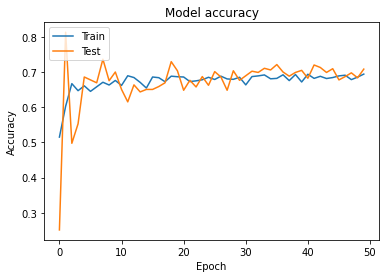

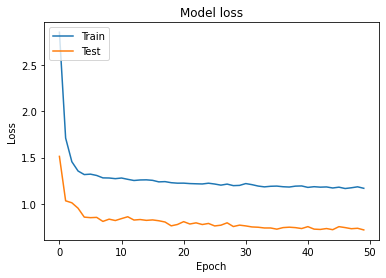

Epoch 1/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1738 - accuracy: 0.6879 - val_loss: 0.7612 - val_accuracy: 0.6557 - lr: 1.0000e-04
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1653 - accuracy: 0.6781 - val_loss: 0.7161 - val_accuracy: 0.7075 - lr: 1.0000e-04
Epoch 3/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1581 - accuracy: 0.7087 - val_loss: 0.7531 - val_accuracy: 0.6722 - lr: 1.0000e-04
Epoch 4/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1762 - accuracy: 0.6832 - val_loss: 0.7435 - val_accuracy: 0.6792 - lr: 1.0000e-04
Epoch 5/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1604 - accuracy: 0.6906 - val_loss: 0.7365 - val_accuracy: 0.6887 - lr: 1.0000e-04
Epoch 6/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1591 - accuracy: 0.6804 - val_loss: 0.7153 - val_accuracy: 0.7064 - lr: 1.0000e-04
Epoch 7/50
159/159 [==========================

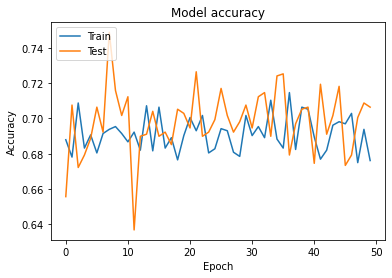

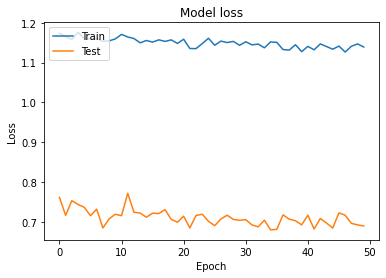

Epoch 1/50
159/159 [==============================] - 1s 5ms/step - loss: 1.1419 - accuracy: 0.6859 - val_loss: 0.7245 - val_accuracy: 0.6651 - lr: 1.0000e-04
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1340 - accuracy: 0.6753 - val_loss: 0.7008 - val_accuracy: 0.6922 - lr: 1.0000e-04
Epoch 3/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1241 - accuracy: 0.7005 - val_loss: 0.7130 - val_accuracy: 0.6863 - lr: 1.0000e-04
Epoch 4/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1308 - accuracy: 0.6910 - val_loss: 0.6915 - val_accuracy: 0.7040 - lr: 1.0000e-04
Epoch 5/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1359 - accuracy: 0.6946 - val_loss: 0.6948 - val_accuracy: 0.6993 - lr: 1.0000e-04
Epoch 6/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1328 - accuracy: 0.6887 - val_loss: 0.6742 - val_accuracy: 0.7217 - lr: 1.0000e-04
Epoch 7/50
159/159 [==========================

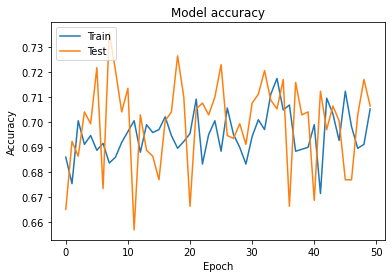

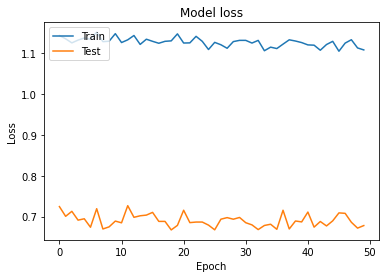

Epoch 1/50
159/159 [==============================] - 1s 5ms/step - loss: 1.1172 - accuracy: 0.6993 - val_loss: 0.7301 - val_accuracy: 0.6498 - lr: 1.0000e-04
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1274 - accuracy: 0.6828 - val_loss: 0.6790 - val_accuracy: 0.7064 - lr: 1.0000e-04
Epoch 3/50
159/159 [==============================] - 1s 5ms/step - loss: 1.1136 - accuracy: 0.7040 - val_loss: 0.6867 - val_accuracy: 0.6993 - lr: 1.0000e-04
Epoch 4/50
159/159 [==============================] - 1s 5ms/step - loss: 1.1173 - accuracy: 0.6934 - val_loss: 0.7060 - val_accuracy: 0.6733 - lr: 1.0000e-04
Epoch 5/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1232 - accuracy: 0.6820 - val_loss: 0.6819 - val_accuracy: 0.7075 - lr: 1.0000e-04
Epoch 6/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1237 - accuracy: 0.6946 - val_loss: 0.6632 - val_accuracy: 0.7217 - lr: 1.0000e-04
Epoch 7/50
159/159 [==========================

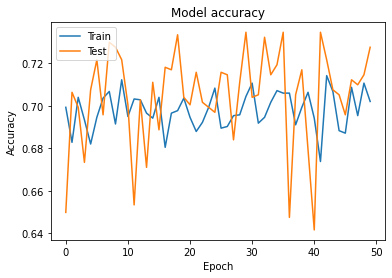

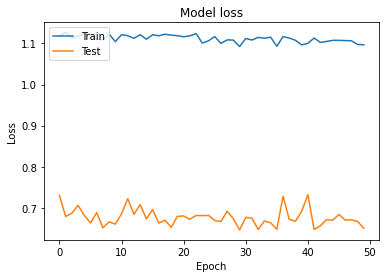

Epoch 1/50
159/159 [==============================] - 1s 5ms/step - loss: 1.1002 - accuracy: 0.7013 - val_loss: 0.7126 - val_accuracy: 0.6627 - lr: 1.0000e-04
Epoch 2/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1059 - accuracy: 0.6820 - val_loss: 0.6599 - val_accuracy: 0.7193 - lr: 1.0000e-04
Epoch 3/50
159/159 [==============================] - 1s 4ms/step - loss: 1.0958 - accuracy: 0.7095 - val_loss: 0.6742 - val_accuracy: 0.6981 - lr: 1.0000e-04
Epoch 4/50
159/159 [==============================] - 1s 4ms/step - loss: 1.1036 - accuracy: 0.6977 - val_loss: 0.6934 - val_accuracy: 0.6769 - lr: 1.0000e-04
Epoch 5/50
159/159 [==============================] - 1s 5ms/step - loss: 1.0967 - accuracy: 0.6961 - val_loss: 0.6470 - val_accuracy: 0.7252 - lr: 1.0000e-04
Epoch 6/50
159/159 [==============================] - 1s 5ms/step - loss: 1.0967 - accuracy: 0.6993 - val_loss: 0.6504 - val_accuracy: 0.7217 - lr: 1.0000e-04
Epoch 7/50
159/159 [==========================

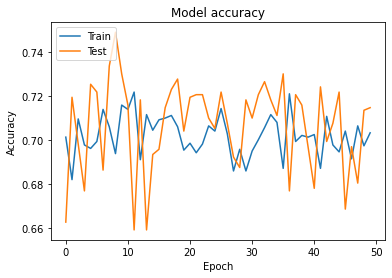

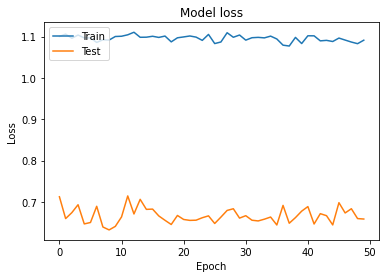

In [31]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
#n_epochs = [100, 80, 60, 40, 20]
class_weights = {0:1.0, 1:5.0}
for i in range(5):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 16, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)

In [32]:
evaluation = model.evaluate(x_train, y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

106/106 [==============================] - 1s 5ms/step - loss: 0.6510 - accuracy: 0.7199
Loss: 0.65104079246521
Accuracy: 0.7199292182922363


In [33]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

27/27 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.6992924528301887


,Predicted: 0,Predicted: 1
Actual:0,506,213
Actual:1,42,87


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       719
           1       0.29      0.67      0.41       129

    accuracy                           0.70       848
   macro avg       0.61      0.69      0.60       848
weighted avg       0.83      0.70      0.74       848

